# Exploratory Analysis

- Admission Rates
- Length of Stay
- Mortality Rates

Author - Samuel Holt (23087175)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Capstone

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Capstone


In [2]:
# Packages
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
admitted = pd.read_csv('admitted.csv').drop(columns=['subject_id', 'stay_id', 'disposition', 'chiefcomplaint', 'in_date'])

length_of_stay = pd.read_csv('length_of_stay.csv').drop(columns=['subject_id', 'stay_id', 'disposition', 'chiefcomplaint', 'in_date'])

expired = pd.read_csv('mortality.csv').drop(columns=['subject_id', 'stay_id', 'disposition', 'chiefcomplaint', 'in_date'])

In [4]:
cat_cols = admitted.select_dtypes('object').columns
admitted_dummied = pd.get_dummies(admitted, columns=cat_cols)

cat_cols = length_of_stay.select_dtypes('object').columns
length_of_stay_dummied = pd.get_dummies(length_of_stay, columns=cat_cols)

cat_cols = expired.select_dtypes('object').columns
expired_dummied = pd.get_dummies(expired, columns=cat_cols)

0    254545
1    173739
Name: admitted, dtype: int64


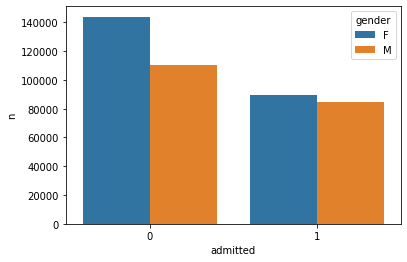

In [22]:
def get_a_simple_bar_plot(df, vars):
  counts = df[vars].value_counts().reset_index()
  counts.columns = vars + ['n']
  ax = sns.barplot(
      x = vars[0],
      y = 'n',
      hue = vars[1],
      data=counts
  )

get_a_simple_bar_plot(admitted, ['admitted', 'gender'])
print(admitted.admitted.value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


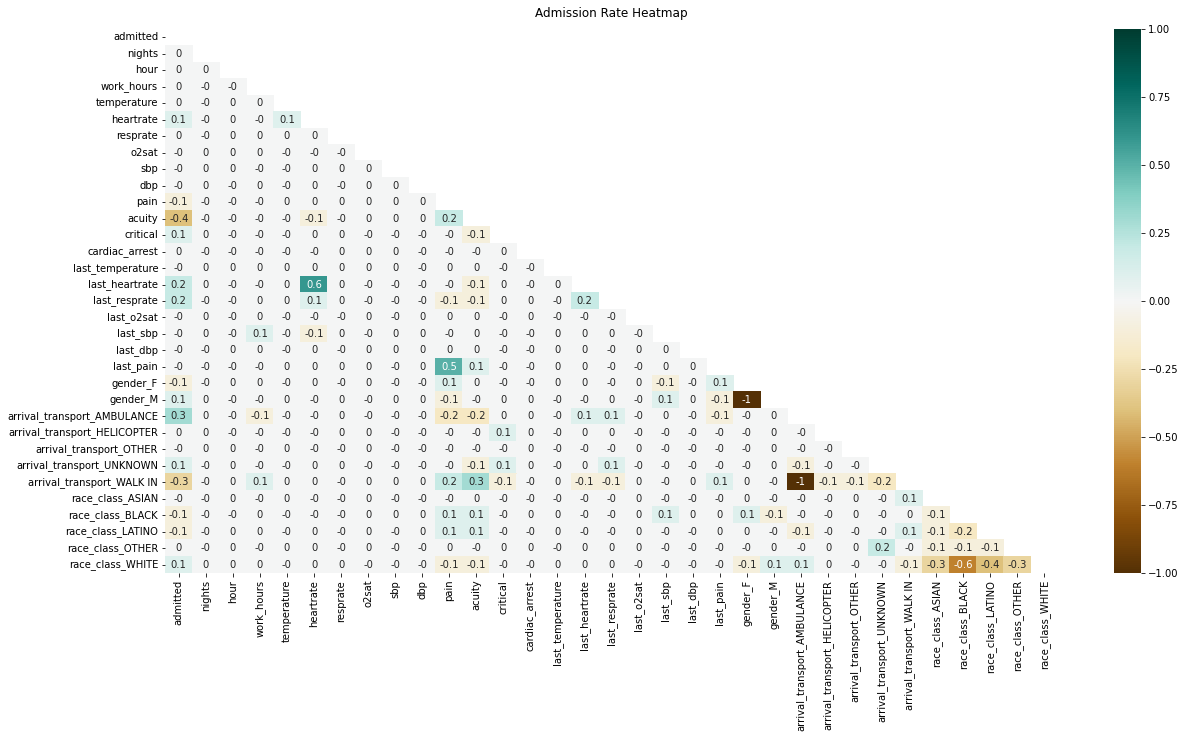

In [12]:
def turn_up_the_heatmaps(df, title='Correlation Heatmap', round_to=2):
  plt.figure(figsize=(20, 10))
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
  sns.heatmap(round(df.corr(),round_to),
              mask=mask,
              cmap='BrBG',
              vmin=-1, 
              vmax=1, 
              annot=True).set_title(title, fontdict={'fontsize':12}, pad=12)

turn_up_the_heatmaps(admitted_dummied, 'Admission Rate Heatmap',1)

Within Today       115682
Within the Week     37183
Beyond a Week       20874
Name: length_of_stay, dtype: int64


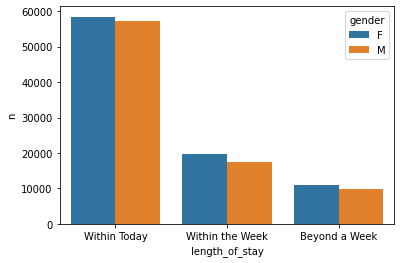

In [19]:
get_a_simple_bar_plot(length_of_stay, ['length_of_stay', 'gender'])
print(length_of_stay.length_of_stay.value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


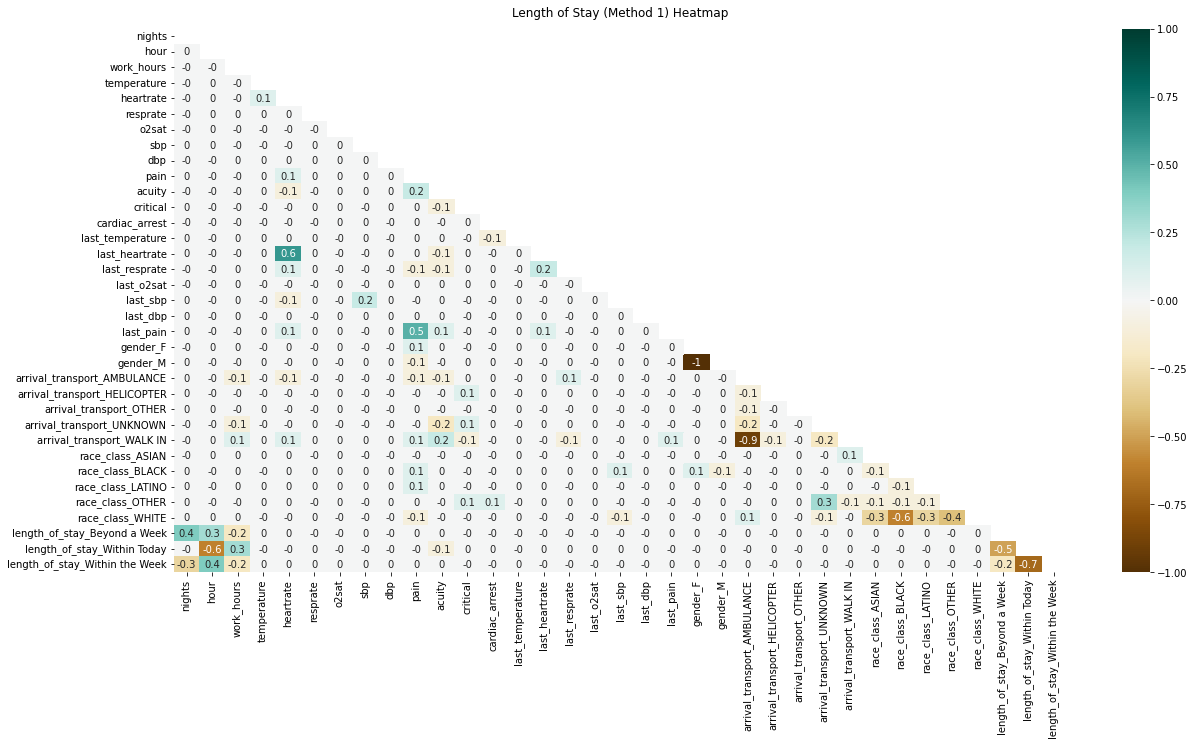

In [15]:
turn_up_the_heatmaps(length_of_stay_dummied, 'Length of Stay (Method 1) Heatmap', 1)

0    173739
1       395
Name: expired, dtype: int64


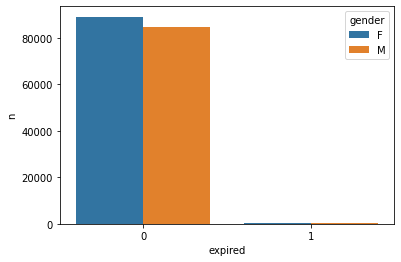

In [20]:
get_a_simple_bar_plot(expired, ['expired', 'gender'])
print(expired.expired.value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


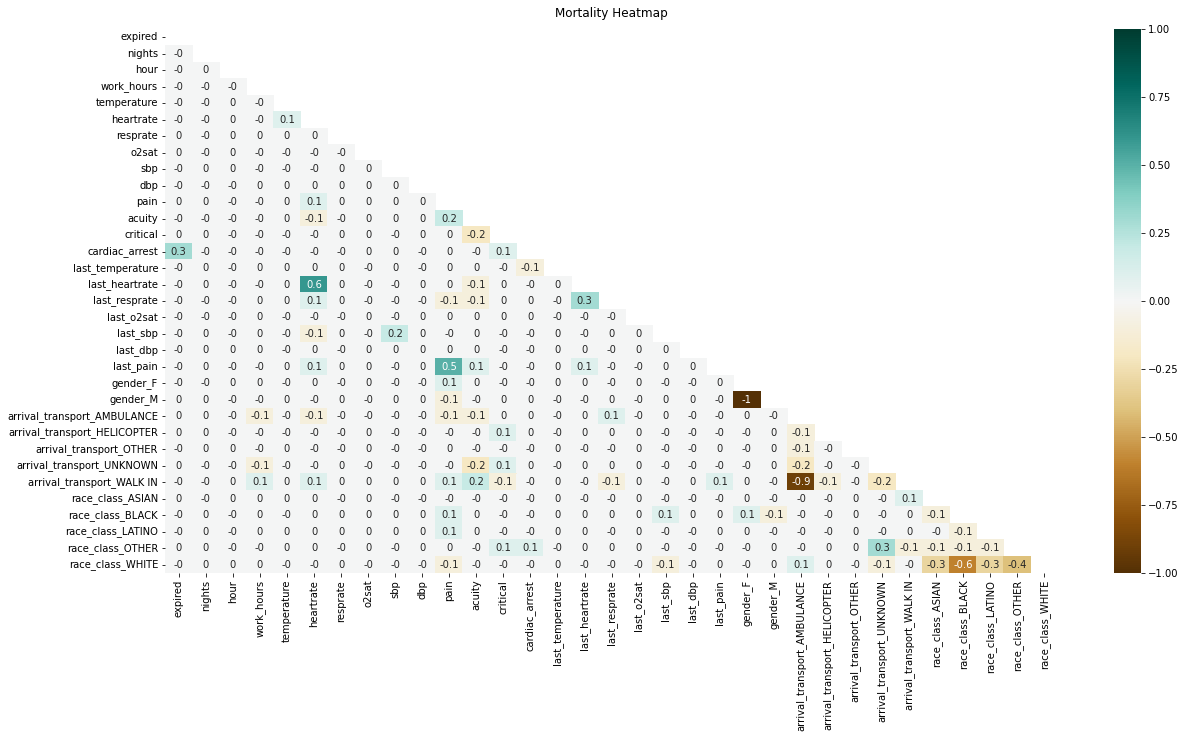

In [16]:
turn_up_the_heatmaps(expired_dummied, 'Mortality Heatmap', 1)